In [1]:
%matplotlib inline
import sys
sys.path.append('../..')
from analysis.analysistools import make_feature_list, remove_feature_from_list, get_models, plot_ftr_importance

# Feature Importance -- Removing Features
We'll start by looking at classifiers trained with the full list of features. Boosting parameters are all defaults.


In [2]:
features = make_feature_list()
base_path = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/train-test-split"
models = get_models(base_path)

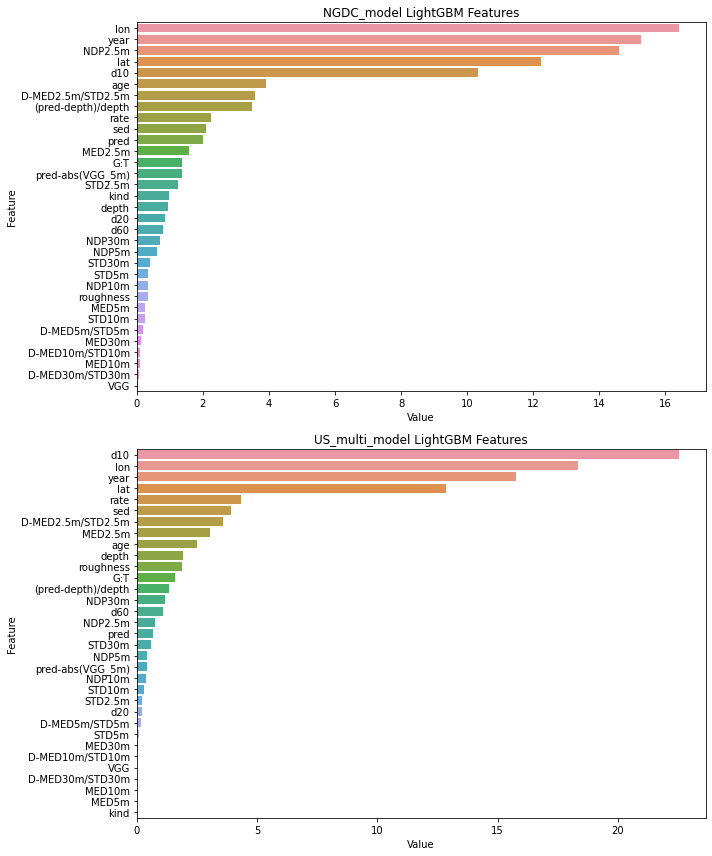

In [3]:
plot_ftr_importance(models,features)

## Remove features -- Lat, Lon, Year
We see that some of the most important features between the two models are lon, lat, and year. Those features might be biasing our model. What happens when we remove them?

In [4]:
features = remove_feature_from_list(features,['lon','lat','year'])
base_path = "/swot2/features/MODEL_RUNS/02_NO_LAT_LON_YR/train-test-split"
models = get_models(base_path)

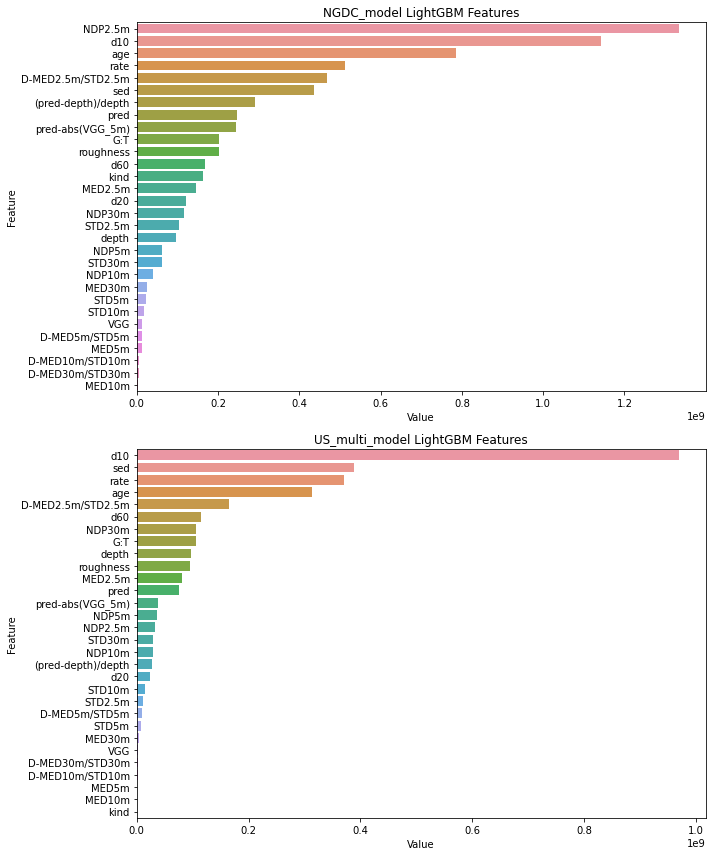

In [5]:
plot_ftr_importance(models,features)

## Remove d10 feature
Now, we start removing features again. First, we remove d10, the track density within 10 km.
Note at this point the number of model iterations has been reduced, and number of leaves + min data per leaf have been changed.

In [6]:
features = remove_feature_from_list(features,['d10'])
base_path = "/swot2/features/MODEL_RUNS/04_NO_d10/train-test-split"
models = get_models(base_path)

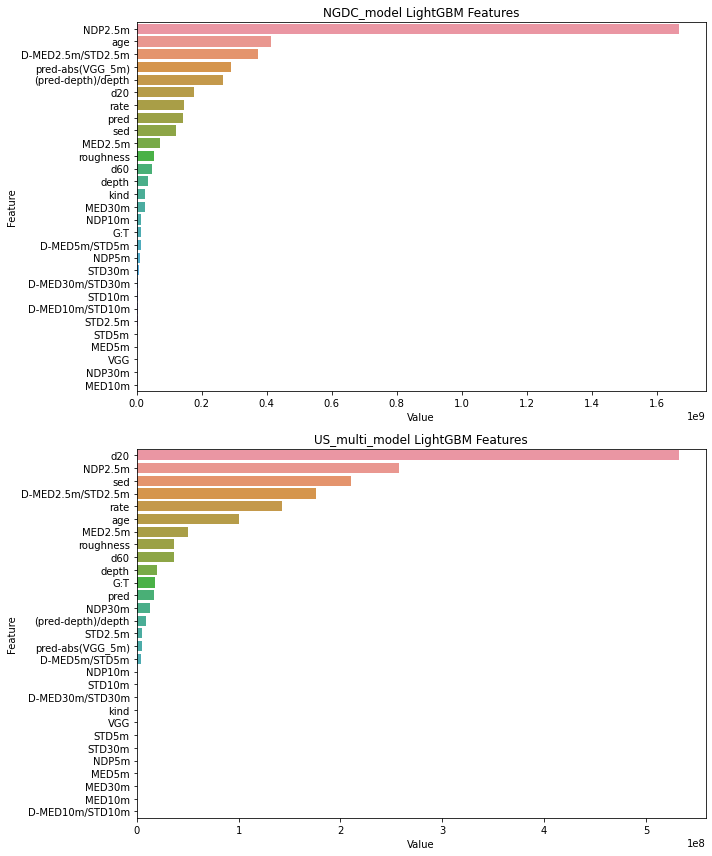

In [7]:
plot_ftr_importance(models,features)

## Remove d20 and NDP2.5
Remove two more features. D20 is the track density within 20 km. NDP2.5m is the number of data points in a 2.5 min (~5km) grid cell.

In [8]:
features = remove_feature_from_list(features,['d20','NDP2.5m'])
base_path = "/swot2/features/MODEL_RUNS/05_NO_d20/train-test-split"
models = get_models(base_path)

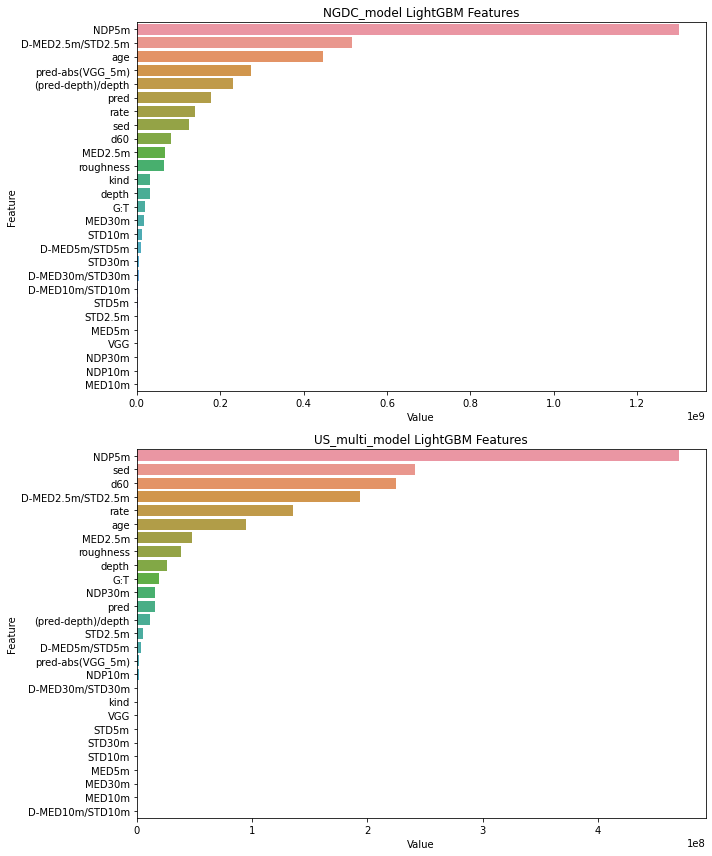

In [9]:
plot_ftr_importance(models,features)

## Remove NDP5m
Remove NDP5m, number of data points in a 5 min (~10 km) grid cell.

In [10]:
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/06_NO_NDP5/train-test-split"
models = get_models(base_path)

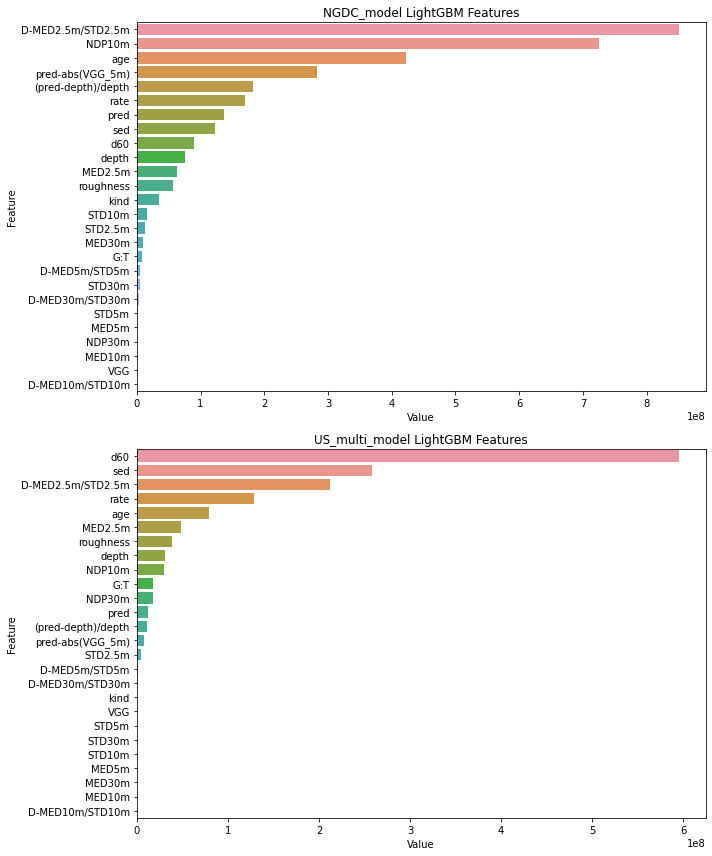

In [11]:
plot_ftr_importance(models,features)

## Remove NDP10m and d60
Remove NDP10m, number of data points in a 10 min (~20 km) grid cell. Note the additional model "all_model," which is trained on both US_multi and NGDC data.

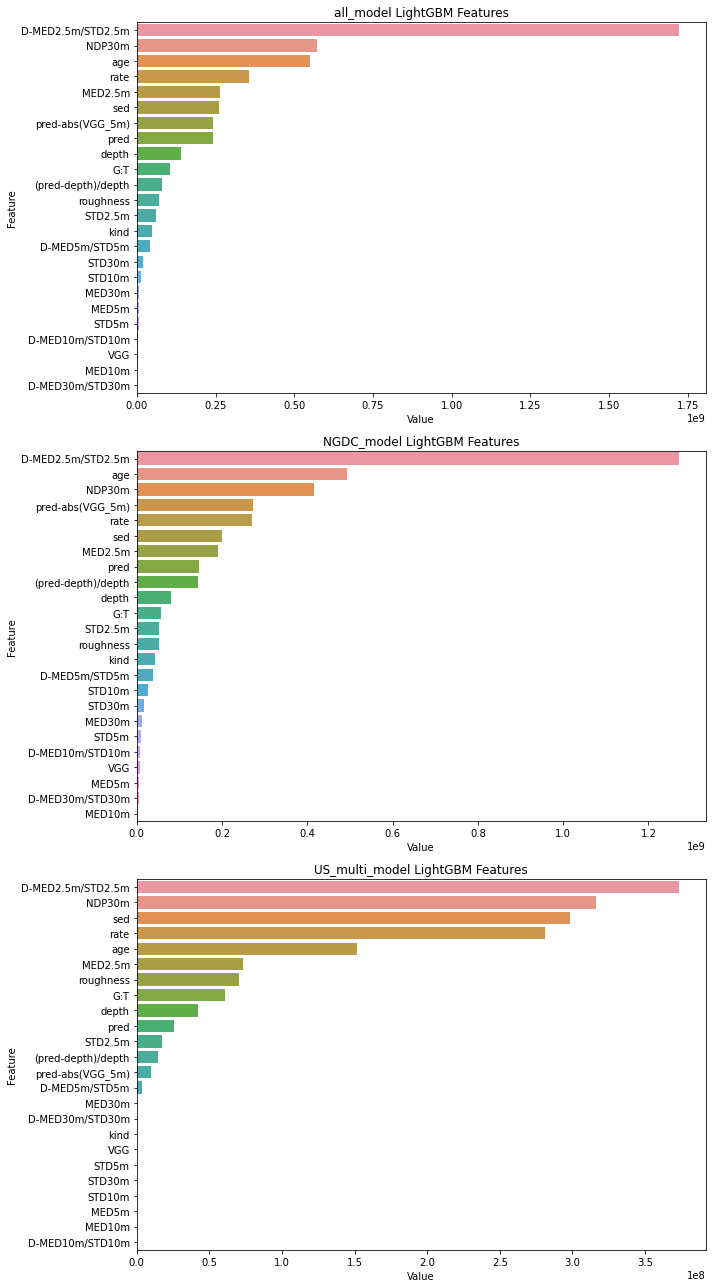

In [12]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','d60','NDP2.5m','NDP5m','NDP10m'])
base_path = "/swot2/features/MODEL_RUNS/12_NO_NDP10/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

# NDP30
Here's a little mini-test I needed to run, there are three model runs. First, I removed NDP30 which is sort of the last of the "spatial" features that I think would bias the model in favor of lat/lon it has already seen.

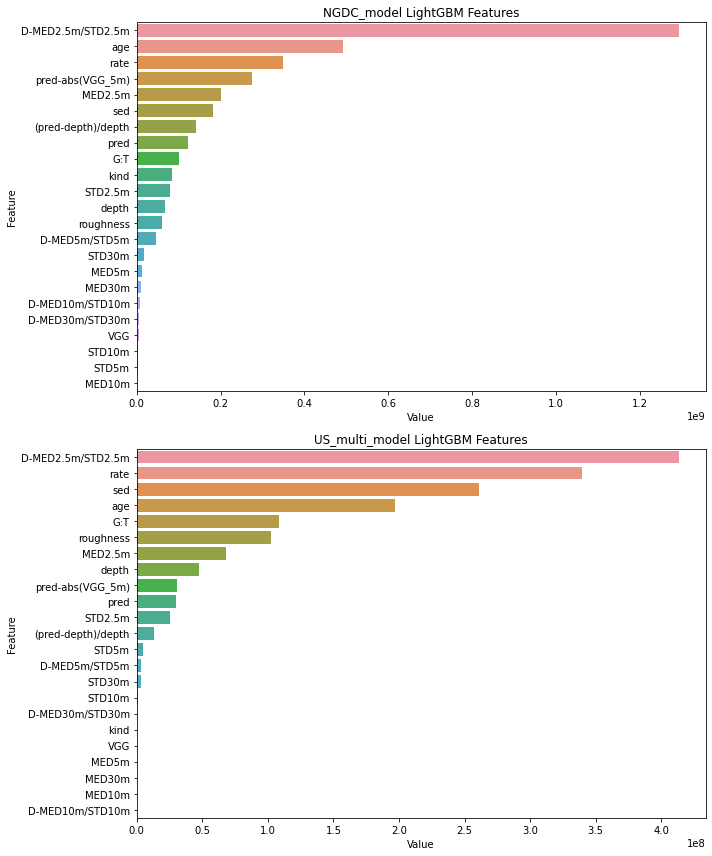

In [13]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','d60','NDP2.5m','NDP5m','NDP10m','NDP30m'])
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)